# This notebook has the plotting codes; use fitting_na_16.ipynb to run optimizations

In [1]:
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats
import bluepyopt as bpop
import curve_fitting as cf
import bluepyopt.deapext.algorithms as algo
import generalized_genSim_shorten_time as ggsd
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
from deap import tools
import multiprocessing
import eval_helper_na12 as eh16

In [2]:
eh16.set_channel("na12")

In [3]:
import json
with open('./csv_files/mutants_parameters.txt') as f:
    data = f.read()
    js = json.loads(data)
#js['A_wt']

In [4]:
# adjust parameters here

param_range_file = "./csv_files/param_stats_wide_na12.csv"
mutant_name = "T400RAdult"
mutant_protocol_csv_name = './csv_files/mutant_protocols_CHOP.csv'
get_baseline_param_fn = eh16.get_wt_params_adultWT()

In [5]:
# just set parameters here, then simply click through to get a dictionary of parameters as well as plots
new_par = [29.37455303390747, -57.73385584119139, 11.891550446498853, 0.7034480970709812, 0.7458471676703804, -76.54492828977375, -4.360135868594882, 1.0753187187691573, 7.743820332718601, 0.4342886254656672, 0.42061600443361485, 1.8527146017814786, 0.17671265620260843, 0.04089488556627415, -37.52777117761381, 4.1662221609375685, -104.4691271236539, 0.05585446125335954, 29.571131958843388, 2.5137334884656872, 56.76570675176218, -116.41680866340164, -6.558415415201545, 48.5320376591091]
p1 = [35.336491999433214, -62.922265018227336, 6.653227770670037, 1.6085194858985032, 1.9610096541498063, -25.131096837653246, -32.726622036137094, 7.4088907890561, 6.087139449301829, 0.04977262720771908, 0.34972666166850597, 8.285176002785123, 0.012852797938524651, 0.02881186435129404, -48.48440841793984, 7.760131602919982, -34.078061414435986, 0.08584137995548408, 79.9573778064748, 1.2622891269923364, 72.38254906735173, -72.65001663340412, 40.10652134477391, 49.56803729217332]
p2 = [40.6518011826718, -68.45892040077595, 8.181666327213588, 1.8742317802329294, 1.3082330079972362, -9.04426338852739, -54.76293708028784, 10.485594005027018, 17.671084457713462, 0.034787065828635326, 0.21494047585551085, 8.58846797647392, 0.029781461742604185, 0.14652470096376696, -51.68700463245487, 8.185824645523601, -13.54798895332122, 0.05810506573617848, 40.8735721471482, 1.9800603003428943, 22.16027055518856, -96.66272614384832, -38.58008401623804, 56.14941520049753]
new_par = p2

In [6]:
# use this to make a dictionary out of the parameters
eh16.make_params_dict(new_par)

{'sh_na12': 40.6518011826718,
 'tha_na12': -68.45892040077595,
 'qa_na12': 8.181666327213588,
 'Ra_na12': 1.8742317802329294,
 'Rb_na12': 1.3082330079972362,
 'thi1_na12': -9.04426338852739,
 'thi2_na12': -54.76293708028784,
 'qd_na12': 10.485594005027018,
 'qg_na12': 17.671084457713462,
 'mmin_na12': 0.034787065828635326,
 'hmin_na12': 0.21494047585551085,
 'q10_na12': 8.58846797647392,
 'Rg_na12': 0.029781461742604185,
 'Rd_na12': 0.14652470096376696,
 'thinf_na12': -51.68700463245487,
 'qinf_na12': 8.185824645523601,
 'vhalfs_na12': -13.54798895332122,
 'a0s_na12': 0.05810506573617848,
 'zetas_na12': 40.8735721471482,
 'gms_na12': 1.9800603003428943,
 'smax_na12': 22.16027055518856,
 'vvh_na12': -96.66272614384832,
 'vvs_na12': -38.58008401623804,
 'Ena_na12': 56.14941520049753}

In [7]:
get_baseline_param_fn

[35.336491999433214,
 -62.922265018227336,
 6.653227770670037,
 1.6085194858985032,
 1.9610096541498063,
 -25.131096837653246,
 -32.726622036137094,
 7.4088907890561,
 6.087139449301829,
 0.04977262720771908,
 0.34972666166850597,
 8.285176002785123,
 0.012852797938524651,
 0.02881186435129404,
 -48.48440841793984,
 7.760131602919982,
 -34.078061414435986,
 0.08584137995548408,
 79.9573778064748,
 1.2622891269923364,
 72.38254906735173,
 -72.65001663340412,
 40.10652134477391,
 49.56803729217332]

(actual, goal)
activation v half: (-1.8200000000000003, -1.9)
activation slope: (1.1669980119284293, 1.04)


E:\GitHub\SimulatingVariants\CHOP\files_for_optimization\generalized_genSim_shorten_time.py:705: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
E:\GitHub\SimulatingVariants\CHOP\files_for_optimization\generalized_genSim_shorten_time.py:705: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


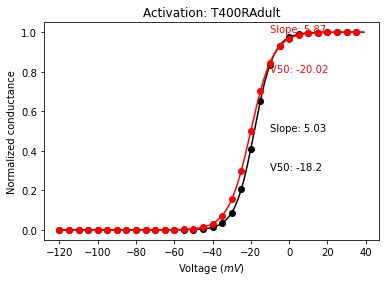

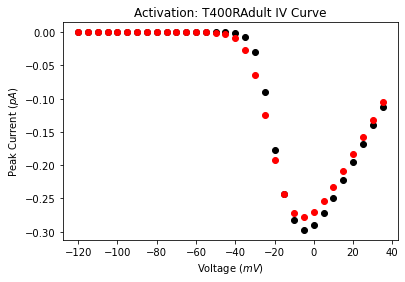

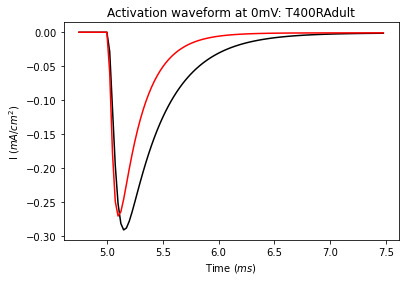

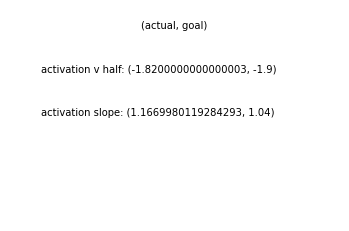

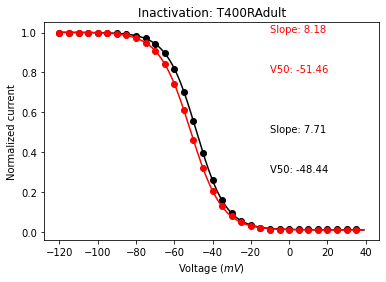

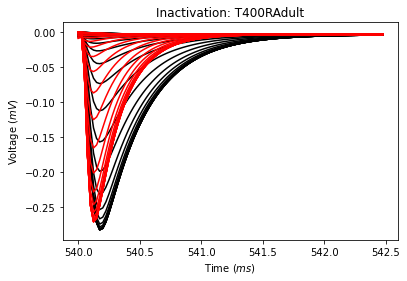

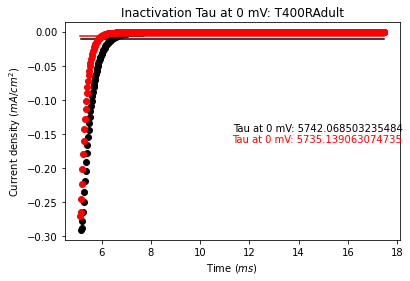

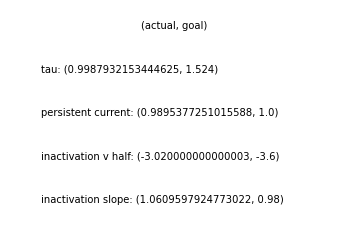

In [8]:
# makes individual plots, and saves the plots as a pdf file to "filename"
eh16.make_act_plots(new_par, mutant_name, mutant_protocol_csv_name, param_values_wt = get_baseline_param_fn, filename = './Plots_Folder/jinan_act.pdf')
eh16.make_inact_plots(new_par, mutant_name, mutant_protocol_csv_name, param_values_wt = get_baseline_param_fn, filename = './Plots_Folder/jinan_inact.pdf')

In [9]:
wt_inact = ggsd.Inactivation(channel_name = 'na12')
wt_inact.genInactivation()

print(wt_inact.v_vec)
print(wt_inact.ipeak_vec)

[-120 -115 -110 -105 -100  -95  -90  -85  -80  -75  -70  -65  -60  -55
  -50  -45  -40  -35  -30  -25  -20  -15  -10   -5    0    5   10   15
   20   25   30   35]
[-0.27127976230719714, -0.27136019279269097, -0.27139359126184315, -0.2713423258994153, -0.2711373489082475, -0.27065247450756313, -0.26965875169810205, -0.2677462257212511, -0.2641985562600116, -0.25781976243906146, -0.24677832284611875, -0.2287127992896136, -0.2015984334734076, -0.1656723517480197, -0.1251357586728385, -0.08685725719202385, -0.056252506235685985, -0.03478222380438569, -0.021378940481373974, -0.013056028099992935, -0.008083531300889969, -0.005204227904167351, -0.003157016947791707, -0.00315701694688603, -0.003157016946886032, -0.003157016946886036, -0.00315701694688603, -0.003157016946886035, -0.0031570169468860335, -0.003157016946886032, -0.0031570169468860317, -0.0031570169468860313]


In [10]:
wt_act = ggsd.Activation(channel_name = 'na12')
wt_act.L

32